## Final Project Submission

Please fill out:
* Student name: Jacob M. Hansen
* Student pace: part time - flex
* Scheduled project review date/time: 9AM, July 15th, 2022
* Instructor name: Morgan Jones
* Blog post URL:


### Objective

Microsoft sees all the big companies creating original video content and they want to get in on the fun. They have decided to create a new movie studio, but they don’t know anything about creating movies. 
* Explore what types of films are currently doing the best at the box office. 


* Translate those findings into actionable insights that the head of Microsoft's new movie studio can use to help decide what type of films to create.



### Questions for Data Analysis

* Over the course of the past decade which movies have had the largest box office success in terms of both domestic and worldwide sales?

* What is the relationship between production costs and expected worldwide gross revenue? 

* What can Microsoft expect to pay in movie production costs?

* What are some attributes of movie success? Consider audience attention spans when it comes to movie length. Also consider the time of year of when movies are frequently released. 


### Workflow Process

* Identify and import needed data science packages and libraries
* Read and examine the provided databases. Identify the data types and structure of the information in each database.
* Begin exploratory analysis by cleaning, filtering and grouping data based upon initial questions. 
* Further explore, clean, and filter data. Use aggregate functions to identify trends and patterns.
* Create Exploratory data visualizations to further identify trends and patterns.
* Create Explanatory data visualization to communicate findings. 

In [70]:
#import packages and libraries

import pandas as pd
import numpy as np

import matplotlib as plt
import seaborn as sns

#Use 'magic' inline function to display in notebook
%matplotlib inline



### Read Datasets, Identify Content and Structure

Read the provided datasets: Box Office Mojo, Movie Budgets, and IMDB. Create a dataframe for each dataset using the Pandas library. Identify the content and structure of each dataset. Identify the length of data and data types. Examine for missing data and make an initial plan to manage any missing values. 

#### Exploratory Analysis of the Box Office Mojo data

##### Use Pandas

In [71]:
# Read the Box Office Mojo dataset

bom_df = pd.read_csv('bom.movie_gross.csv')

In [72]:
type(bom_df)

pandas.core.frame.DataFrame

In [73]:
# Identify content structure and length

bom_df.shape

(3387, 5)

In [74]:
# Explore the content

bom_df

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [75]:
# Identify missing data. 

bom_df.isna().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [76]:
# Identify datatypes related to missing data.

bom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [77]:
# Examine the fundamental stats of domestic gross

bom_df.describe().astype(int)

,domestic_gross,year
count,3359,3387
mean,28745845,2013
std,66982498,2
min,100,2010
25%,120000,2012
50%,1400000,2014
75%,27900000,2016
max,936700000,2018


In [78]:
# Examine the year 2010 for trends. Drop missing data to do so.

bom_df_2010 = bom_df[(bom_df['year'] == 2010)]

bom_df_2010 = bom_df_2010.dropna()


In [79]:
# Examine domestic gross for 2010 compare to overall BOM dataset. 

bom_df_2010.describe().astype(int)

,domestic_gross,year
count,308,308
mean,32963448,2010
std,60668552,0
min,800,2010
25%,280250,2010
50%,4000000,2010
75%,40400000,2010
max,415000000,2010


In [80]:
#Identify year 2010 domestic gross mean and median

print("Domestic 2010 gross box office mean", 
      bom_df_2010['domestic_gross'].mean())

print("Domestic 2010 gross box office median", 
      bom_df_2010['domestic_gross'].median())

Domestic 2010 gross box office mean 32963448.373376623
Domestic 2010 gross box office median 4000000.0


In [81]:
# Examine another year for comparison to 2010. Choose 2018 to see difference over greater 
# time period. 

bom_df_2018 = bom_df[(bom_df['year'] == 2018)]

bom_df_2018.dropna()

,title,studio,domestic_gross,foreign_gross,year
3079,Avengers: Infinity War,BV,678800000.0,"1,369.5",2018
3080,Black Panther,BV,700100000.0,646900000,2018
3081,Jurassic World: Fallen Kingdom,Uni.,417700000.0,891800000,2018
3082,Incredibles 2,BV,608600000.0,634200000,2018
3083,Aquaman,WB,335100000.0,812700000,2018
...,...,...,...,...,...
3275,I Still See You,LGF,1400.0,1500000,2018
3286,The Catcher Was a Spy,IFC,725000.0,229000,2018
3309,Time Freak,Grindstone,10000.0,256000,2018
3342,Reign of Judges: Title of Liberty - Concept Short,Darin Southa,93200.0,5200,2018


In [82]:
bom_df_2018.describe().astype(int)

,domestic_gross,year
count,308,308
mean,36010421,2018
std,85733961,0
min,1300,2018
25%,175250,2018
50%,2700000,2018
75%,35950000,2018
max,700100000,2018


In [83]:
#Identify year 2018 domestic gross mean and median. Compare to 2010 mean and median.

print("Domestic 2018 gross box office mean", 
      bom_df_2018['domestic_gross'].mean())

print("Domestic 2018 gross box office median", 
      bom_df_2018['domestic_gross'].median())

Domestic 2018 gross box office mean 36010421.75
Domestic 2018 gross box office median 2700000.0


#### Box Office Mojo Dataset summary

The Box Office Mojo dataset contains data about movie titles, which studio released the film, and gross revenue broken out into domestic and foreign returns.  The movie release years range from 2010 to 2018.  The median domestic gross for all years was USD 1.4 million, but this can vary quite a bit year to year.  Many of the datatypes are not numeric and there are several columns, particularly foreign gross, that are missing data. 

#### Explore Movie Budgets dataset

Read and explore the movie budgets database. Identify the data structure, data types and whether there is any missing data. Identify relevant data that could be joined with the Box Office Mojo dataset. 

#### Use Pandas

In [84]:
budgets_df = pd.read_csv('tn.movie_budgets.csv')

In [85]:
budgets_df[:10]


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,"$306,000,000","$936,662,225","$2,053,311,220"
6,7,"Apr 27, 2018",Avengers: Infinity War,"$300,000,000","$678,815,482","$2,048,134,200"
7,8,"May 24, 2007",Pirates of the Caribbean: At Worldâs End,"$300,000,000","$309,420,425","$963,420,425"
8,9,"Nov 17, 2017",Justice League,"$300,000,000","$229,024,295","$655,945,209"
9,10,"Nov 6, 2015",Spectre,"$300,000,000","$200,074,175","$879,620,923"


In [86]:
budgets_df.tail()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0
5781,82,"Aug 5, 2005",My Date With Drew,"$1,100","$181,041","$181,041"


In [87]:
budgets_df.shape

(5782, 6)

In [88]:
#Identify any missing data
budgets_df.isna().sum()

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

In [89]:
#Find data types
budgets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


##### Movie budgets database summary:

This df consists of 6 columns and 5782 rows, there is no missing data. Production budgets and gross revenue are currently stored as objects or strings, these will need to be changed to integers or floats to do any data aggregation.  The movie column can serve as possible index id for a dataframe join with the bom_df for further analysis and data visualizations. 

#### Explore the IMDB database.

Explore the imdb tables and associated data for relevant information related to primary business questions. Identify primary and foreign keys to join, filter, group, and limit data. Create a dataframe that can be joined or merged with bom_df and budgets_df for further analysis and data visualizations.

#### Use sqlite3

In [90]:
import sqlite3 
conn = sqlite3.connect('im.db')

In [91]:
#import the entity relational diagram (ERD) for this database

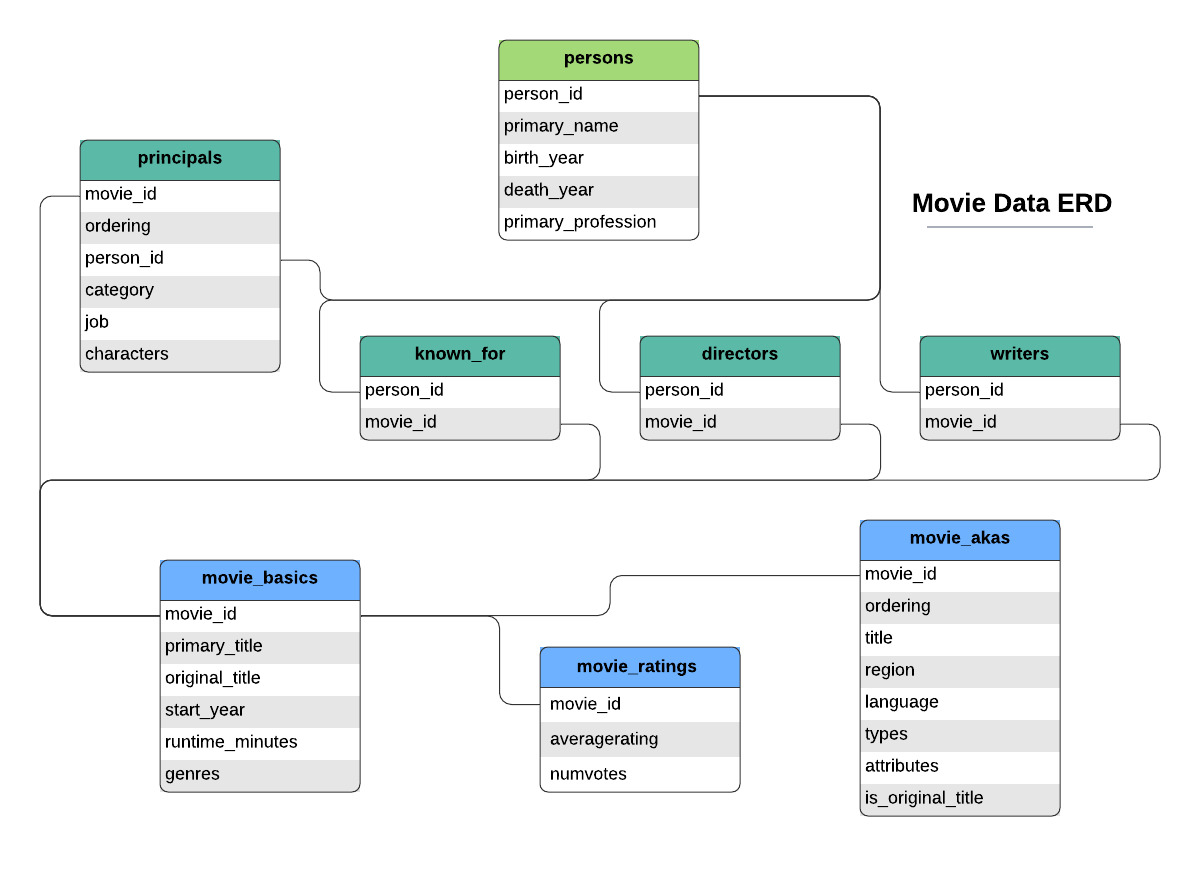


#### Read and Examine individual tables 

In [92]:
#Examine and identify datatypes for movie_basics table

movie_basics_df = pd.read_sql("""SELECT * FROM movie_basics;""", conn)

movie_basics_df

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


In [93]:
movie_basics_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [94]:
#Examine and identify datatypes for movie_ratings table

movie_ratings_df = pd.read_sql("""SELECT * FROM movie_ratings;""", conn)

movie_ratings_df.head()

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [95]:
movie_ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movie_id       73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [96]:
# Examine and identify data types for movie_akas table

movie_akas_df = pd.read_sql("""SELECT * FROM movie_akas;""", conn)

movie_akas_df.head()

,movie_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,None,None,0.0
1,tt0369610,11,Jurashikku warudo,JP,None,imdbDisplay,None,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,None,imdbDisplay,None,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,None,None,short title,0.0
4,tt0369610,14,Jurassic World,FR,None,imdbDisplay,None,0.0


In [97]:
movie_akas_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331703 entries, 0 to 331702
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   movie_id           331703 non-null  object 
 1   ordering           331703 non-null  int64  
 2   title              331703 non-null  object 
 3   region             278410 non-null  object 
 4   language           41715 non-null   object 
 5   types              168447 non-null  object 
 6   attributes         14925 non-null   object 
 7   is_original_title  331678 non-null  float64
dtypes: float64(1), int64(1), object(6)
memory usage: 20.2+ MB


In [98]:
# Merge individual imdb tables into one dataframe using movie_id 

imdb_df = pd.merge(pd.merge(
    movie_basics_df, movie_ratings_df,on='movie_id'),
    movie_akas_df, on='movie_id').drop_duplicates(subset = 'movie_id')

imdb_df = imdb_df.reset_index(drop = True)

imdb_df

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,ordering,title,region,language,types,attributes,is_original_title
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,1,Sangharsh,IN,hi,None,alternative transliteration,0.0
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43,1,One Day Before the Rainy Season,XWW,en,None,None,0.0
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517,10,La otra cara del viento,VE,None,None,None,0.0
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13,1,Subse Bada Sukh,IN,bn,None,None,0.0
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119,1,La Telenovela Errante,None,None,original,None,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69572,tt9899860,Watching This Movie Is a Crime,Didan in film jorm ast,2019,100.0,"Drama,Thriller",8.1,7,1,Watching This Movie Is a Crime,XWW,en,imdbDisplay,None,0.0
69573,tt9899880,Columbus,Columbus,2018,85.0,Comedy,5.8,5,1,Columbus,None,None,original,None,1.0
69574,tt9903952,BADMEN with a good behavior,BADMEN with a good behavior,2018,87.0,"Comedy,Horror",9.2,5,1,BADMEN with a good behavior,DE,None,None,None,0.0
69575,tt9905462,Pengalila,Pengalila,2019,111.0,Drama,8.4,600,1,Pengalila,None,None,original,None,1.0


In [99]:
imdb_df.isna().sum()

movie_id                 0
primary_title            0
original_title           0
start_year               0
runtime_minutes       6747
genres                 640
averagerating            0
numvotes                 0
ordering                 0
title                    0
region               11444
language             63871
types                45395
attributes           67562
is_original_title        0
dtype: int64

#### IMDB dataset summary

This dataset contains a wide range of data. I examined three specific tables and joined them into one dataframe. The data provides details on movie categories such as runtime, genres, rating, and languages.  The dataframe is the lengthiest with nearly 70,000 entries. there is a range of missing data in several categories. Some of these could be easily managed using the median or mode, but it is likely some data will need to be dropped to analyze efficiently. The imdb dataframe could be joined to the other datasets using the primary_title column.

### Join or Merge Dataframes.
Join or merge the three dataframes from imdb, box office mojo, and production budgets into one dataframe for data cleaning, further analysis and data visualizations. Use the movie titles as primary and foreign keys. 

#### Use Pandas

In [100]:
# Merge the box office mojo dataset and budget dataset

big_movie_df = pd.merge(bom_df, budgets_df, left_on='title', right_on='movie')

big_movie_df.columns

Index(['title', 'studio', 'domestic_gross_x', 'foreign_gross', 'year', 'id',
       'release_date', 'movie', 'production_budget', 'domestic_gross_y',
       'worldwide_gross'],
      dtype='object')

In [101]:
#drop column 'movie', keep 'title' as the primary key

big_movie_df.drop('movie', axis=1, inplace=True)

In [102]:
big_movie_df.head()

,title,studio,domestic_gross_x,foreign_gross,year,id,release_date,production_budget,domestic_gross_y,worldwide_gross
0,Toy Story 3,BV,415000000.0,652000000,2010,47,"Jun 18, 2010","$200,000,000","$415,004,880","$1,068,879,522"
1,Inception,WB,292600000.0,535700000,2010,38,"Jul 16, 2010","$160,000,000","$292,576,195","$835,524,642"
2,Shrek Forever After,P/DW,238700000.0,513900000,2010,27,"May 21, 2010","$165,000,000","$238,736,787","$756,244,673"
3,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000,2010,53,"Jun 30, 2010","$68,000,000","$300,531,751","$706,102,828"
4,Iron Man 2,Par.,312400000.0,311500000,2010,15,"May 7, 2010","$170,000,000","$312,433,331","$621,156,389"


In [103]:
#Merge big_movie_df with imdb_df using title and primary_title

super_df = pd.merge(big_movie_df, imdb_df, left_on='title', right_on='primary_title')

super_df.head()

,title_x,studio,domestic_gross_x,foreign_gross,year,id,release_date,production_budget,domestic_gross_y,worldwide_gross,...,genres,averagerating,numvotes,ordering,title_y,region,language,types,attributes,is_original_title
0,Toy Story 3,BV,415000000.0,652000000,2010,47,"Jun 18, 2010","$200,000,000","$415,004,880","$1,068,879,522",...,"Adventure,Animation,Comedy",8.3,682218,10,Η ιστορία των παιχνιδιών 3,GR,None,None,None,0.0
1,Inception,WB,292600000.0,535700000,2010,38,"Jul 16, 2010","$160,000,000","$292,576,195","$835,524,642",...,"Action,Adventure,Sci-Fi",8.8,1841066,10,Începutul,RO,None,imdbDisplay,None,0.0
2,Shrek Forever After,P/DW,238700000.0,513900000,2010,27,"May 21, 2010","$165,000,000","$238,736,787","$756,244,673",...,"Adventure,Animation,Comedy",6.3,167532,10,Shrek nüüd ja igavesti,EE,None,None,None,0.0
3,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000,2010,53,"Jun 30, 2010","$68,000,000","$300,531,751","$706,102,828",...,"Adventure,Drama,Fantasy",5.0,211733,10,The Twilight Saga: Eclipse,IT,None,imdbDisplay,None,0.0
4,Iron Man 2,Par.,312400000.0,311500000,2010,15,"May 7, 2010","$170,000,000","$312,433,331","$621,156,389",...,"Action,Adventure,Sci-Fi",7.0,657690,10,Homem de Ferro 2,BR,None,None,None,0.0


### Clean Data.

Identify duplicate columns and drop based on datatype and missing data. For any remaining missing data convert NaN to either mean, median, or mode or consider keeping as a missing category. Consider carefully how much data to drop entirely.

In [104]:
#Identify datatypes

super_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1398 entries, 0 to 1397
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title_x            1398 non-null   object 
 1   studio             1398 non-null   object 
 2   domestic_gross_x   1397 non-null   float64
 3   foreign_gross      1202 non-null   object 
 4   year               1398 non-null   int64  
 5   id                 1398 non-null   int64  
 6   release_date       1398 non-null   object 
 7   production_budget  1398 non-null   object 
 8   domestic_gross_y   1398 non-null   object 
 9   worldwide_gross    1398 non-null   object 
 10  movie_id           1398 non-null   object 
 11  primary_title      1398 non-null   object 
 12  original_title     1398 non-null   object 
 13  start_year         1398 non-null   int64  
 14  runtime_minutes    1371 non-null   float64
 15  genres             1392 non-null   object 
 16  averagerating      1398 

In [105]:
#Identify missing data

super_df.isna().sum()

title_x                 0
studio                  0
domestic_gross_x        1
foreign_gross         196
year                    0
id                      0
release_date            0
production_budget       0
domestic_gross_y        0
worldwide_gross         0
movie_id                0
primary_title           0
original_title          0
start_year              0
runtime_minutes        27
genres                  6
averagerating           0
numvotes                0
ordering                0
title_y                 0
region                 99
language             1205
types                 465
attributes           1342
is_original_title       0
dtype: int64

In [106]:
# Drop following columns: 'id', 'ordering', 'language', 'types',
# 'attributes', 'is_original-title'
super_df.drop(['id', 'ordering', 'language', 'types', 
               'attributes', 'is_original_title', 'region', 'start_year'], 
              axis=1, inplace = True)



In [107]:
super_df

,title_x,studio,domestic_gross_x,foreign_gross,year,release_date,production_budget,domestic_gross_y,worldwide_gross,movie_id,primary_title,original_title,runtime_minutes,genres,averagerating,numvotes,title_y
0,Toy Story 3,BV,415000000.0,652000000,2010,"Jun 18, 2010","$200,000,000","$415,004,880","$1,068,879,522",tt0435761,Toy Story 3,Toy Story 3,103.0,"Adventure,Animation,Comedy",8.3,682218,Η ιστορία των παιχνιδιών 3
1,Inception,WB,292600000.0,535700000,2010,"Jul 16, 2010","$160,000,000","$292,576,195","$835,524,642",tt1375666,Inception,Inception,148.0,"Action,Adventure,Sci-Fi",8.8,1841066,Începutul
2,Shrek Forever After,P/DW,238700000.0,513900000,2010,"May 21, 2010","$165,000,000","$238,736,787","$756,244,673",tt0892791,Shrek Forever After,Shrek Forever After,93.0,"Adventure,Animation,Comedy",6.3,167532,Shrek nüüd ja igavesti
3,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000,2010,"Jun 30, 2010","$68,000,000","$300,531,751","$706,102,828",tt1325004,The Twilight Saga: Eclipse,The Twilight Saga: Eclipse,124.0,"Adventure,Drama,Fantasy",5.0,211733,The Twilight Saga: Eclipse
4,Iron Man 2,Par.,312400000.0,311500000,2010,"May 7, 2010","$170,000,000","$312,433,331","$621,156,389",tt1228705,Iron Man 2,Iron Man 2,124.0,"Action,Adventure,Sci-Fi",7.0,657690,Homem de Ferro 2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1393,Gotti,VE,4300000.0,NaN,2018,"Jun 15, 2018","$10,000,000","$4,286,367","$6,089,100",tt1801552,Gotti,Gotti,112.0,"Biography,Crime,Drama",4.8,10358,Готи
1394,Bilal: A New Breed of Hero,VE,491000.0,1700000,2018,"Feb 2, 2018","$30,000,000","$490,973","$648,599",tt3576728,Bilal: A New Breed of Hero,Bilal: A New Breed of Hero,105.0,"Action,Adventure,Animation",8.0,16854,Bilal: A Lenda
1395,Mandy,RLJ,1200000.0,NaN,2018,"Sep 14, 2018","$6,000,000","$1,214,525","$1,427,656",tt4995858,Mandy,Mandy,113.0,"Drama,Thriller",4.1,39,Mandy
1396,Mandy,RLJ,1200000.0,NaN,2018,"Sep 14, 2018","$6,000,000","$1,214,525","$1,427,656",tt6998518,Mandy,Mandy,121.0,"Action,Fantasy,Horror",6.6,44378,Mandy


In [108]:
#Keep title_x and drop duplicate column movie titles

super_df.drop(['title_y', 'primary_title', 'original_title'], axis=1, inplace = True)


In [109]:
#Drop duplicate gross revenue columns 'domestic_gross_x' and 'foreign_gross'

super_df.drop(['domestic_gross_x', 'foreign_gross'], axis=1, inplace = True)

In [110]:
#drop 'movie_id', use super_df index for new id

super_df.drop(['movie_id'], axis = 1, inplace = True)

In [111]:
super_df.columns

Index(['title_x', 'studio', 'year', 'release_date', 'production_budget',
       'domestic_gross_y', 'worldwide_gross', 'runtime_minutes', 'genres',
       'averagerating', 'numvotes'],
      dtype='object')

In [112]:
super_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1398 entries, 0 to 1397
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title_x            1398 non-null   object 
 1   studio             1398 non-null   object 
 2   year               1398 non-null   int64  
 3   release_date       1398 non-null   object 
 4   production_budget  1398 non-null   object 
 5   domestic_gross_y   1398 non-null   object 
 6   worldwide_gross    1398 non-null   object 
 7   runtime_minutes    1371 non-null   float64
 8   genres             1392 non-null   object 
 9   averagerating      1398 non-null   float64
 10  numvotes           1398 non-null   int64  
dtypes: float64(2), int64(2), object(7)
memory usage: 131.1+ KB


In [113]:
#convert production budget to integer datatype 

super_df["production_budget"] = super_df["production_budget"].replace(
    "[$,]", "", regex=True).astype(int)

In [114]:
#convert domestic gross and worldwide gross to integer datatype
super_df["domestic_gross_y"] = super_df["domestic_gross_y"].replace(
    "[$,]", "", regex=True).astype(int)

super_df["worldwide_gross"] = super_df["worldwide_gross"].replace(
    "[$,]", "", regex=True).astype(int)

In [116]:
# Confirm data types for further filtering
super_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1398 entries, 0 to 1397
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title_x            1398 non-null   object 
 1   studio             1398 non-null   object 
 2   year               1398 non-null   int64  
 3   release_date       1398 non-null   object 
 4   production_budget  1398 non-null   int64  
 5   domestic_gross_y   1398 non-null   int64  
 6   worldwide_gross    1398 non-null   int64  
 7   runtime_minutes    1371 non-null   float64
 8   genres             1392 non-null   object 
 9   averagerating      1398 non-null   float64
 10  numvotes           1398 non-null   int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 131.1+ KB


In [117]:
#Examine aggregates on runtime_minutes, identify to replace with mean or median. 

super_df['runtime_minutes'].describe()

count    1371.000000
mean      107.261853
std        19.654739
min         3.000000
25%        95.000000
50%       105.000000
75%       118.000000
max       192.000000
Name: runtime_minutes, dtype: float64

In [118]:
#Use median to replace missing data in runtime_minutes

super_df['runtime_minutes'] = super_df['runtime_minutes'].fillna(
    super_df['runtime_minutes'].median())

In [119]:
# Missing data in genres is categorical, create a 'missing' category

super_df['genres'] = super_df['genres'].fillna('missing')



In [120]:
# Verify all missing data is accounted for. 

super_df.isna().sum()

title_x              0
studio               0
year                 0
release_date         0
production_budget    0
domestic_gross_y     0
worldwide_gross      0
runtime_minutes      0
genres               0
averagerating        0
numvotes             0
dtype: int64

In [121]:
#convert release date into month released only

super_df['release_date'].dtypes

dtype('O')

In [122]:
super_df['release_date'] = pd.to_datetime(super_df['release_date'])

super_df['release_date'].head()

0   2010-06-18
1   2010-07-16
2   2010-05-21
3   2010-06-30
4   2010-05-07
Name: release_date, dtype: datetime64[ns]

In [126]:
# Create a month released column by month name and month number.

super_df['month_released'] = pd.to_datetime(super_df['release_date']).dt.month_name()

super_df['month_num'] = pd.to_datetime(super_df['release_date']).dt.month

super_df.columns

Index(['title_x', 'studio', 'year', 'release_date', 'production_budget',
       'domestic_gross_y', 'worldwide_gross', 'runtime_minutes', 'genres',
       'averagerating', 'numvotes', 'month_released', 'month_num'],
      dtype='object')

In [127]:
# Drop release date and keep months released now.

super_df.drop(['release_date'], axis = 1, inplace = True)

In [128]:
super_df.columns


Index(['title_x', 'studio', 'year', 'production_budget', 'domestic_gross_y',
       'worldwide_gross', 'runtime_minutes', 'genres', 'averagerating',
       'numvotes', 'month_released', 'month_num'],
      dtype='object')

In [129]:
# Rename columns for clarity

super_df.rename(columns = {'title_x': 'Movie_Title', 
                           'domestic_gross_y': 'domestic_gross'}, inplace = True)

print(super_df.columns)

Index(['Movie_Title', 'studio', 'year', 'production_budget', 'domestic_gross',
       'worldwide_gross', 'runtime_minutes', 'genres', 'averagerating',
       'numvotes', 'month_released', 'month_num'],
      dtype='object')


In [130]:
#create new column, separate out foreign_gross

super_df['foreign_gross'] = super_df['worldwide_gross'] - super_df['domestic_gross']

super_df['foreign_gross'].head()

0    653874642
1    542948447
2    517507886
3    405571077
4    308723058
Name: foreign_gross, dtype: int64

In [131]:
# create new column reflecting production percentage of gross revenue.  
# 'production_percent' is the production_budget divided by worldwide_gross revenue.

super_df['production_percent'] = (super_df['production_budget'] / 
                                  super_df['worldwide_gross'])* 100

super_df[['Movie_Title', 'production_percent']].head()

,Movie_Title,production_percent
0,Toy Story 3,18.711183
1,Inception,19.149645
2,Shrek Forever After,21.818336
3,The Twilight Saga: Eclipse,9.630325
4,Iron Man 2,27.368309


#### Consider movie success

It is now important to consider our business question and what makes a movie successful. For a large company such as Microsoft they are likely going to care very much about production costs but also revenue. Sort the dataframe by worldwide gross to further filter by amount of revenue earned for the most successful films. Take the top 50 grossing films of each year available. 

In [138]:
#Sort dataframe by worldwide gross

super_df = super_df.sort_values(by = 'worldwide_gross', ascending = False, 
                                ignore_index = True)

# Examine the top 50 grossing films of the entire dataframe. 

super_df[:50]

,Movie_Title,studio,year,production_budget,domestic_gross,worldwide_gross,runtime_minutes,genres,averagerating,numvotes,month_released,month_num,foreign_gross,production_percent
0,Avengers: Infinity War,BV,2018,300000000,678815482,2048134200,149.0,"Action,Adventure,Sci-Fi",8.5,670926,April,4,1369318718,14.647478
1,Jurassic World,Uni.,2015,215000000,652270625,1648854864,124.0,"Action,Adventure,Sci-Fi",7.0,539338,June,6,996584239,13.039353
2,Furious 7,Uni.,2015,190000000,353007020,1518722794,137.0,"Action,Crime,Thriller",7.2,335074,April,4,1165715774,12.510512
3,Avengers: Age of Ultron,BV,2015,330600000,459005868,1403013963,141.0,"Action,Adventure,Sci-Fi",7.3,665594,May,5,944008095,23.563557
4,Black Panther,BV,2018,200000000,700059566,1348258224,134.0,"Action,Adventure,Sci-Fi",7.3,516148,February,2,648198658,14.833954
5,Jurassic World: Fallen Kingdom,Uni.,2018,170000000,417719760,1305772799,128.0,"Action,Adventure,Sci-Fi",6.2,219125,June,6,888053039,13.019110
6,Frozen,BV,2013,150000000,400738009,1272469910,93.0,"Adventure,Drama,Sport",6.2,62311,November,11,871731901,11.788098
7,Incredibles 2,BV,2018,200000000,608581744,1242520711,118.0,"Action,Adventure,Animation",7.7,203510,June,6,633938967,16.096311
8,The Fate of the Furious,Uni.,2017,250000000,225764765,1234846267,136.0,"Action,Crime,Thriller",6.7,179774,April,4,1009081502,20.245435
9,Iron Man 3,BV,2013,200000000,408992272,1215392272,130.0,"Action,Adventure,Sci-Fi",7.2,692794,May,5,806400000,16.455593


In [135]:
# There are duplicate movie titles, drop duplicate rows by movie title.

super_df = super_df.drop_duplicates(subset= 'Movie_Title', keep="first", ignore_index = True)


In [137]:
# Drop rows where worldwide gross is zero. 

super_df = super_df[:1154]

super_df.describe().astype(int)

#Had trouble with python warning, took a slice instead to drop offending rows. 

,year,production_budget,domestic_gross,worldwide_gross,runtime_minutes,averagerating,numvotes,month_num,foreign_gross,production_percent
count,1154,1154,1154,1154,1154,1154,1154,1154,1154,1154
mean,2013,48884744,63535646,160081187,108,6,129552,6,96545540,216
std,2,57100405,86940237,241619639,18,0,171776,3,162708196,1482
min,2010,50000,0,7943,41,1,5,1,0,0
25%,2011,11000000,9216376,20441424,96,5,27099,4,7017511,22
50%,2014,28000000,35116412,69814368,106,6,72575,7,29701511,40
75%,2016,60000000,78586132,183010703,118,7,157973,10,103420748,82
max,2018,410600000,700059566,2048134200,180,9,1841066,12,1369318718,38219


In [139]:
#Identify top 50 films of each year

df_2010 = super_df[super_df['year'] == 2010][:50]

df_2011 = super_df[super_df['year'] == 2011][:50]

df_2012 = super_df[super_df['year'] == 2012][:50]

df_2013 = super_df[super_df['year'] == 2013][:50]

df_2014 = super_df[super_df['year'] == 2014][:50]

df_2015 = super_df[super_df['year'] == 2015][:50]

df_2016 = super_df[super_df['year'] == 2016][:50]

df_2017 = super_df[super_df['year'] == 2017][:50]

df_2018 = super_df[super_df['year'] == 2018][:50]

# Concatenate each movie year dataframe into one dataframe

top_df = pd.concat([df_2010, df_2011, df_2012, df_2013, 
           df_2014, df_2015, df_2016, df_2017, 
           df_2018])

top_df = top_df.reset_index(drop = True)

top_df.head()



,Movie_Title,studio,year,production_budget,domestic_gross,worldwide_gross,runtime_minutes,genres,averagerating,numvotes,month_released,month_num,foreign_gross,production_percent
0,Toy Story 3,BV,2010,200000000,415004880,1068879522,103.0,"Adventure,Animation,Comedy",8.3,682218,June,6,653874642,18.711183
1,Inception,WB,2010,160000000,292576195,835524642,148.0,"Action,Adventure,Sci-Fi",8.8,1841066,July,7,542948447,19.149645
2,Shrek Forever After,P/DW,2010,165000000,238736787,756244673,93.0,"Adventure,Animation,Comedy",6.3,167532,May,5,517507886,21.818336
3,The Twilight Saga: Eclipse,Sum.,2010,68000000,300531751,706102828,124.0,"Adventure,Drama,Fantasy",5.0,211733,June,6,405571077,9.630325
4,Iron Man 2,Par.,2010,170000000,312433331,621156389,124.0,"Action,Adventure,Sci-Fi",7.0,657690,May,5,308723058,27.368309


In [142]:
# Sort top 50 movies of each year by worldwide gross revenue

top_df = top_df.sort_values(by = 'worldwide_gross', ascending = False, 
                                ignore_index = True)

# Compare top 50 from each year to overall super_df. 

top_df.describe().astype(int)

,year,production_budget,domestic_gross,worldwide_gross,runtime_minutes,averagerating,numvotes,month_num,foreign_gross,production_percent
count,450,450,450,450,450,450,450,450,450,450
mean,2014,93145555,132311331,353810235,114,6,233346,7,221498903,31
std,2,67801985,105307459,294558537,19,0,222595,3,204538803,21
min,2010,3000000,8178001,73866088,59,2,6,1,16100000,1
25%,2012,40000000,63729656,153155012,99,6,85719,5,80887642,17
50%,2014,75000000,100350308,240010799,112,6,165189,7,142493065,26
75%,2016,140000000,162946882,443582754,127,7,320307,11,291295377,39
max,2018,410600000,700059566,2048134200,180,8,1841066,12,1369318718,127


In [143]:
super_df.describe().astype(int)

,year,production_budget,domestic_gross,worldwide_gross,runtime_minutes,averagerating,numvotes,month_num,foreign_gross,production_percent
count,1154,1154,1154,1154,1154,1154,1154,1154,1154,1154
mean,2013,48884744,63535646,160081187,108,6,129552,6,96545540,216
std,2,57100405,86940237,241619639,18,0,171776,3,162708196,1482
min,2010,50000,0,7943,41,1,5,1,0,0
25%,2011,11000000,9216376,20441424,96,5,27099,4,7017511,22
50%,2014,28000000,35116412,69814368,106,6,72575,7,29701511,40
75%,2016,60000000,78586132,183010703,118,7,157973,10,103420748,82
max,2018,410600000,700059566,2048134200,180,9,1841066,12,1369318718,38219


In [144]:
# Set top_df to super_df to complete data visualization section
super_df = top_df


#### Summary of data cleaning and initial data analysis 

The three initial dataframes were joined into one large dataframe. That dataframe contained duplicate data in several columns such as the movie title or gross revenue. Those columns were dropped. Many columns were missing data. Based on our business questions focusing on movie costs, revenue, and specific movie attributes, more columns were dropped for a more manageable dataframe. Data was missing in several columns such as runtime_minutes. The missing data was replaced with the median in each case due to outliers in data skewing the mean. Some data was labeled as a missing category. 

After cleaning and filtering a new dataframe was created that took the top 50 films of each year. The median cost of the top 50 films is USD 75 million. This is significantly higher than the original dataframe's median cost of USD 28 million. Worldwide revenue median for the top 50 of each year was also significantly higher at USD 240 million compared to all films at under USD 70 million. For a top 50 film in the ensuing years Microsoft can expect to pay a median of 26% of gross revenue, but that can range much higher with the interquartile range being 17-39%.

### Data Visualization - Exploratory
Analyze the dataframe and identify trends and patterns. Begin with exploratory visualizations examining costs, revenue, and data categories that will affect these elements, such as month of release and runtime in minutes.

In [145]:
import matplotlib.pyplot as plt
%matplotlib inline
#plt.rcParams['figure.figsize'] = (10, 10)


#plt.style.available (remove # for plot style options)

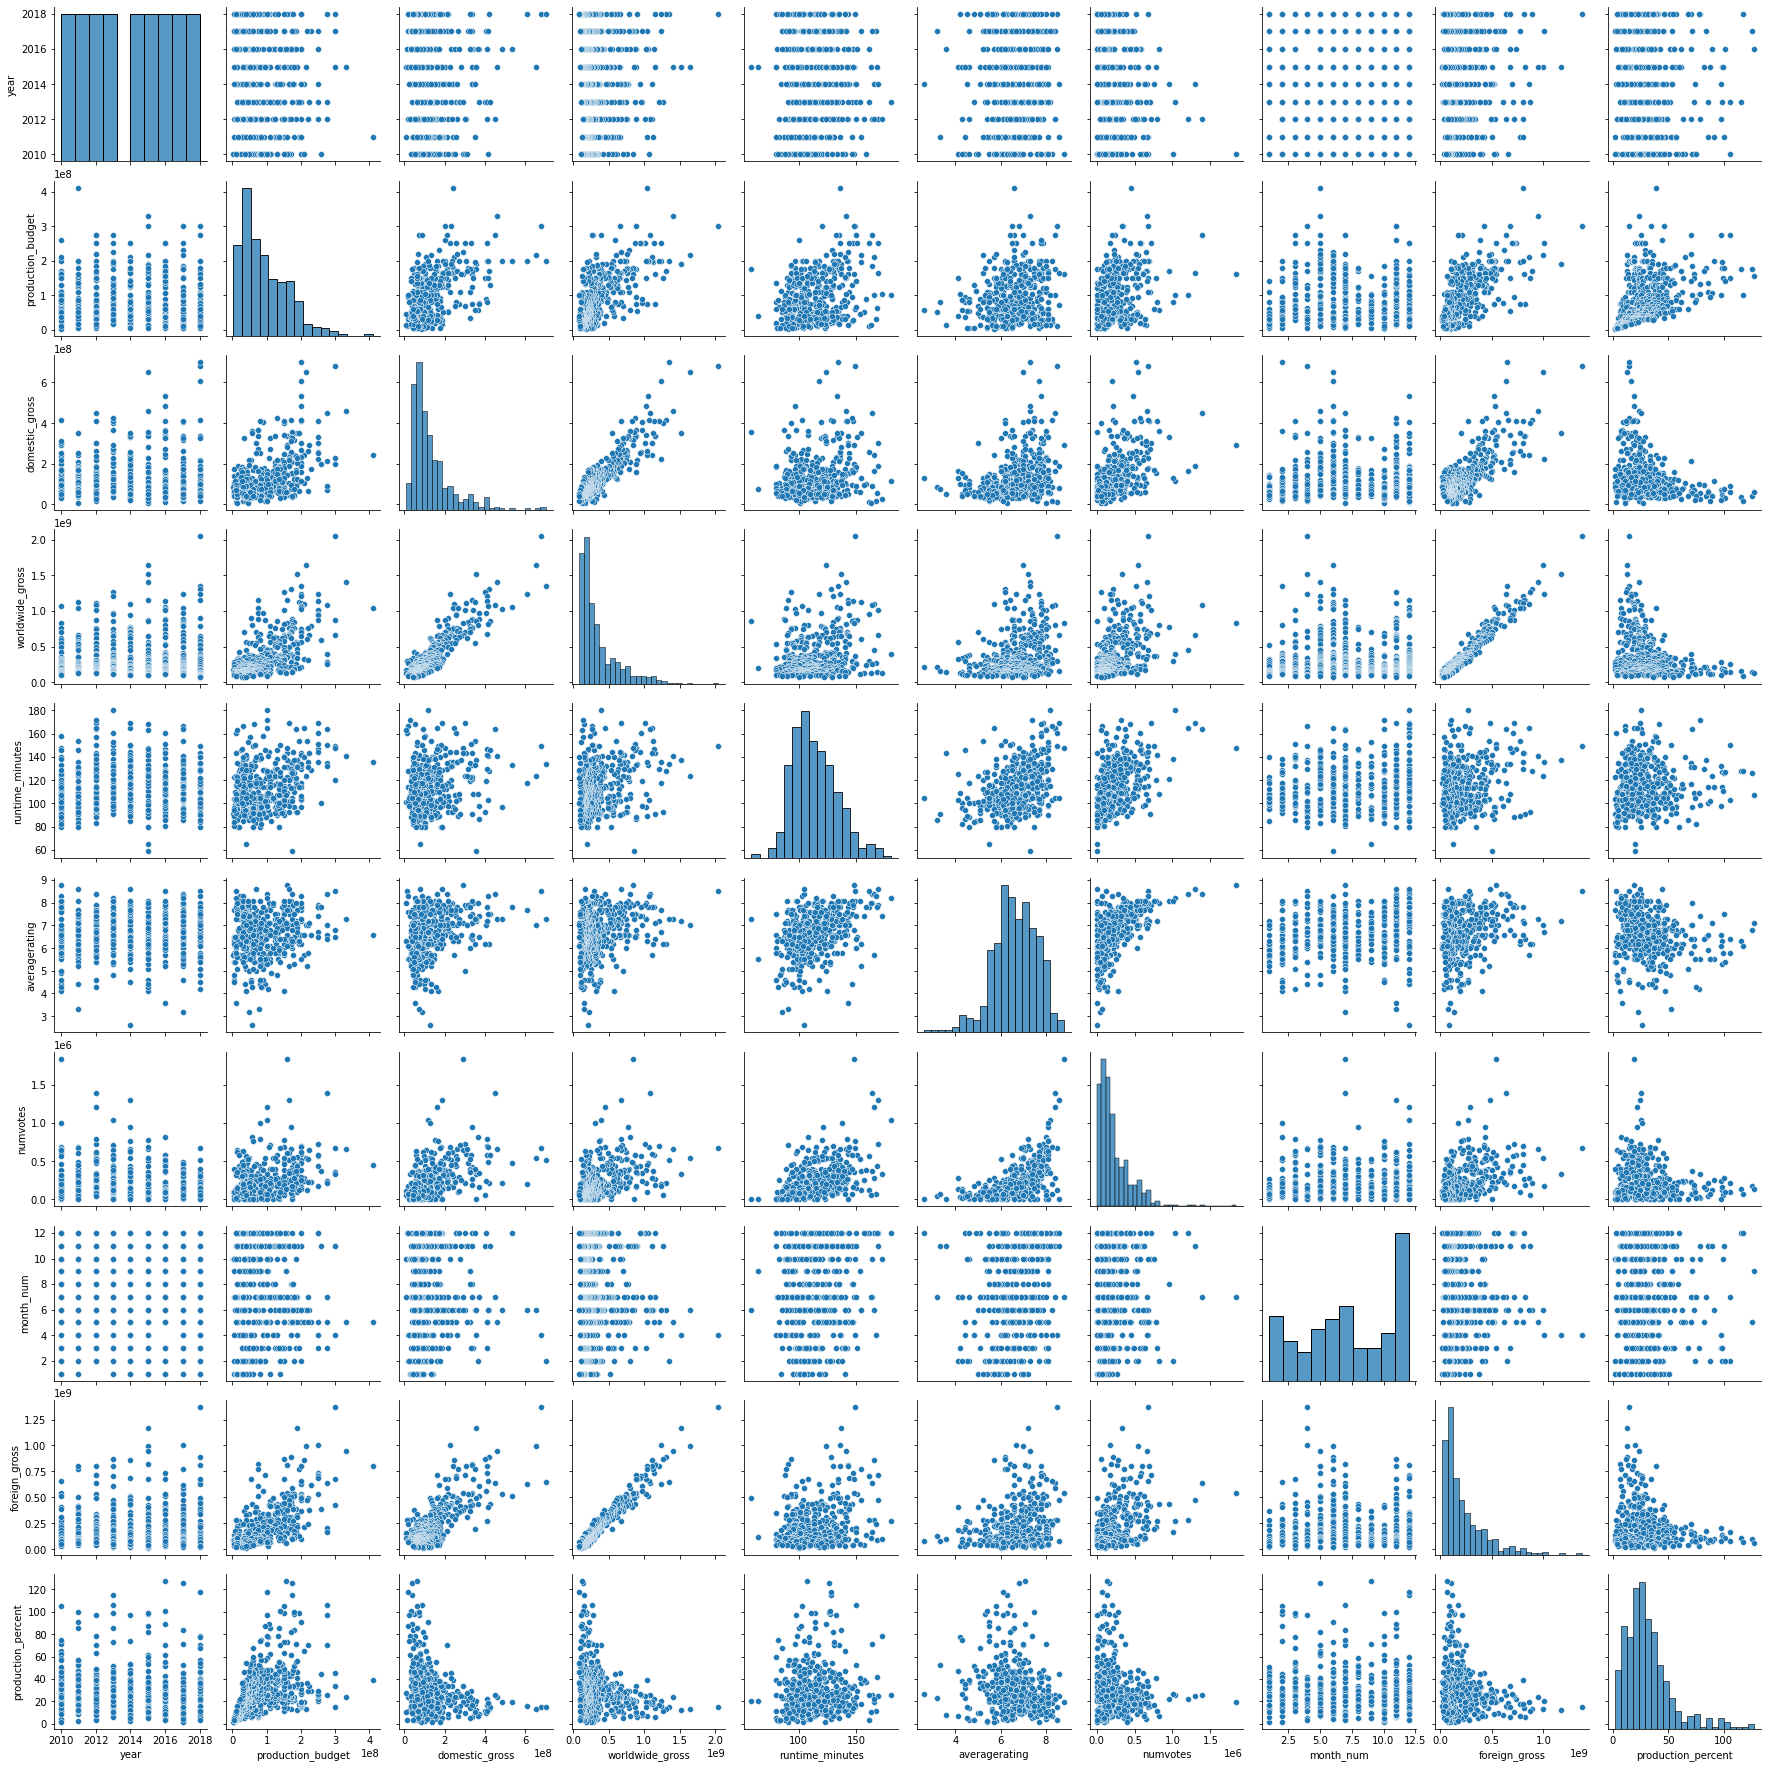

In [146]:
#Run a pairplot using seaborn, identify trends and patterns for further inquiry.

sns.pairplot(super_df)

plt.show()

#### Trends and patterns for exploratory visualizations

Based on the pairplot above, further explore the relationship between worldwide gross, domestic gross and production budgets. Also explore further the runtime minutes category and month released. Examine the production percentages of revenue. Primarily use histograms, bar charts, scatter plots, and boxplots. 

<AxesSubplot:xlabel='worldwide_gross', ylabel='Count'>

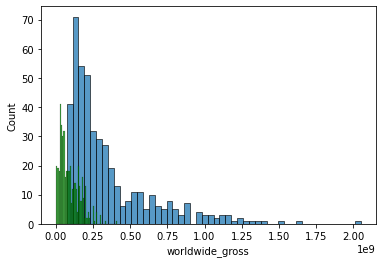

In [152]:
# Examine production budgets and their relationship to worldwide gross revenue 
#using histogram.

sns.histplot(super_df, x = 'worldwide_gross', bins = 50)
sns.histplot(super_df, x = 'production_budget', bins = 50, color = 'green')

In [153]:
#Find the median and mean percentage production cost.

print("The median percentage of production costs for all films is", 
     super_df["production_percent"].median().astype(int), "percent.")

print("The mean percentage of production costs for all films is", 
     super_df["production_percent"].mean().astype(int), "percent.")

The median percentage of production costs for all films is 26 percent.
The mean percentage of production costs for all films is 31 percent.


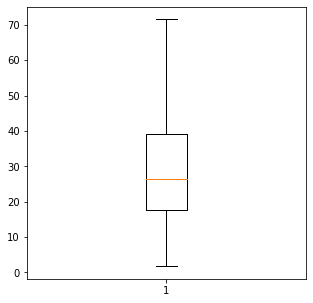

In [154]:
#Create a boxplot to show median and interquartile ranges for production cost 
#percentages of worldwide revenue. Do not show outliers.

fig, ax = plt.subplots(figsize=(5, 5))
plt.boxplot(super_df['production_percent'], showfliers = False);

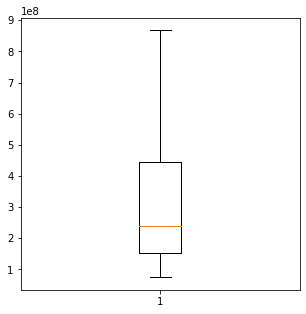

In [156]:
# Examine worldwide revenue median and ranges

fig, ax = plt.subplots(figsize=(5, 5))
plt.boxplot(super_df['worldwide_gross'], showfliers = False);

In [157]:
# Create reference stat dataframe of costs and gross

super_df[['production_budget', 'domestic_gross', 'worldwide_gross', 
          'production_percent']].describe().astype(int)

,production_budget,domestic_gross,worldwide_gross,production_percent
count,450,450,450,450
mean,93145555,132311331,353810235,31
std,67801985,105307459,294558537,21
min,3000000,8178001,73866088,1
25%,40000000,63729656,153155012,17
50%,75000000,100350308,240010799,26
75%,140000000,162946882,443582754,39
max,410600000,700059566,2048134200,127


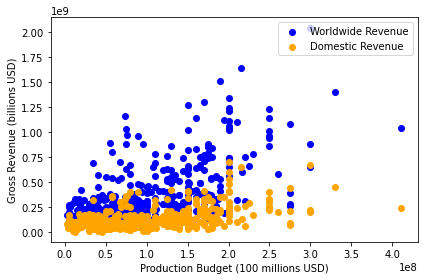

In [158]:
# Examine production budgets and their relationship to worldwide gross revenue with 
#scatter plot. 

fig, ax = plt.subplots()

ax.scatter(super_df['production_budget'], super_df['worldwide_gross'],
            c ='blue')
ax.scatter(super_df['production_budget'], super_df['domestic_gross'],
            c ='orange')
    

ax.set_xlabel('Production Budget (100 millions USD)')
ax.set_ylabel('Gross Revenue (billions USD)')



ax.legend(['Worldwide Revenue', 'Domestic Revenue'], loc='upper right')
plt.tight_layout()


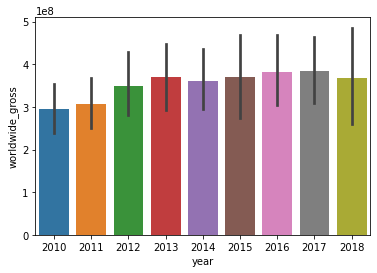

In [159]:
sns.barplot(x ='year', y = 'worldwide_gross', data = super_df);

#### Exploratory Visual Summary Analysis of Costs and Revenue:

It appears that there is a wide range of production budgets with no guarantee of a profit. Median production cost, however, hovers in the mid 20% range of worldwide gross but the mean is above 30% suggesting there are outliers that can leave a production company not making much of a profit or falling into the red. Barring the outliers most production costs fall between 18% to 40% of revenue based on the boxplots. The domestic revenue median hovers above USD 100 million while the worldwide revenue median floats above USD 220 million. This suggests a worldwide release is significant when it comes to ROI and covering productions costs. It also appears there has been a small, but steady increase in gross revenue from 2010 to 2018. 

In [160]:
super_df.columns

Index(['Movie_Title', 'studio', 'year', 'production_budget', 'domestic_gross',
       'worldwide_gross', 'runtime_minutes', 'genres', 'averagerating',
       'numvotes', 'month_released', 'month_num', 'foreign_gross',
       'production_percent'],
      dtype='object')

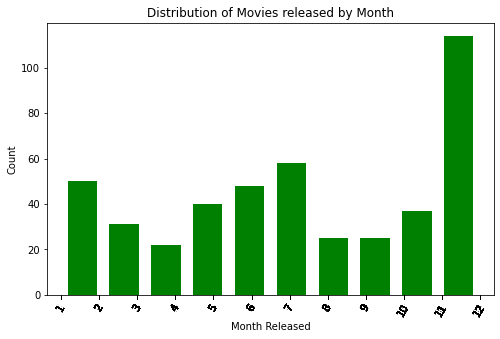

In [161]:
#Show histogram for which month films are released

fig, ax = plt.subplots(figsize = (8, 5))
ax.hist(super_df['month_num'], color='green', rwidth = 0.7)
ax.set_xlabel('Month Released');
ax.set_ylabel('Count')
ax.set_title('Distribution of Movies released by Month')
plt.xticks(super_df['month_num'],
                   rotation=60);

In [162]:
super_df['month_released'].value_counts()

November     59
July         58
December     55
June         48
May          40
October      37
February     31
March        31
August       25
September    25
April        22
January      19
Name: month_released, dtype: int64

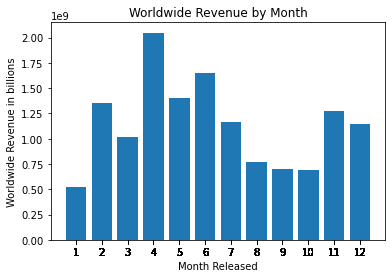

In [163]:
# Examine month released and their relationship to revenue.
fig, ax = plt.subplots()

plt.bar(super_df['month_num'], super_df['worldwide_gross'])

ax.set_xlabel('Month Released');
ax.set_ylabel('Worldwide Revenue in billions')
ax.set_title('Worldwide Revenue by Month')
plt.xticks(super_df['month_num']);

#### Exploratory Visual Summary Analysis of Movie Release Timing: 

It appears that more films are released in the fall months of October, November, and December followed by another grouping in June and July.   Revenue wise May, June, July provide the largest returns followed by the fall months grouping.

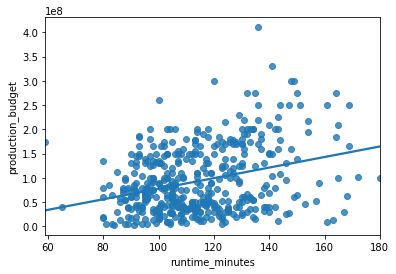

In [164]:
# Examine relationship between runtime minutes and production budget in 100 millions USD
sns.regplot(x = "runtime_minutes",
            y = "production_budget", 
            ci = None,
            data = super_df);


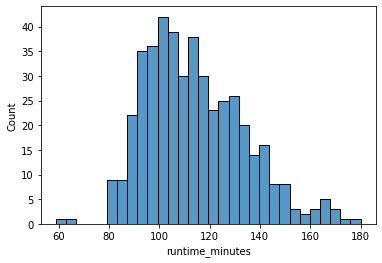

In [165]:
#Identify the peak movie runtime, use histogram

sns.histplot(super_df, x = 'runtime_minutes', bins = 30);

#### Exploratory Visual Summary Analysis of Movie Runtimes in Minutes:

Based on the scatter plot tracking runtime and production budget, generally the longer the film the increase in costs. Most films are centered around the 90-110 minute mark.

### Data Visualization - Explanatory 
Create three to four high quality data visualizations that show the following:

* The relationship between movie production costs and gross revenue both domestically and worldwide. 
* The median and range of production costs across the years 2010 to 2018. 
* The month of release that is most likely to draw more viewers and thus higher revenue to offset production costs. 
* Runtime in minutes related to production costs.

In [166]:
super_df.describe().astype(int)

,year,production_budget,domestic_gross,worldwide_gross,runtime_minutes,averagerating,numvotes,month_num,foreign_gross,production_percent
count,450,450,450,450,450,450,450,450,450,450
mean,2014,93145555,132311331,353810235,114,6,233346,7,221498903,31
std,2,67801985,105307459,294558537,19,0,222595,3,204538803,21
min,2010,3000000,8178001,73866088,59,2,6,1,16100000,1
25%,2012,40000000,63729656,153155012,99,6,85719,5,80887642,17
50%,2014,75000000,100350308,240010799,112,6,165189,7,142493065,26
75%,2016,140000000,162946882,443582754,127,7,320307,11,291295377,39
max,2018,410600000,700059566,2048134200,180,8,1841066,12,1369318718,127


#### Use Seaborn and MatPlotLib

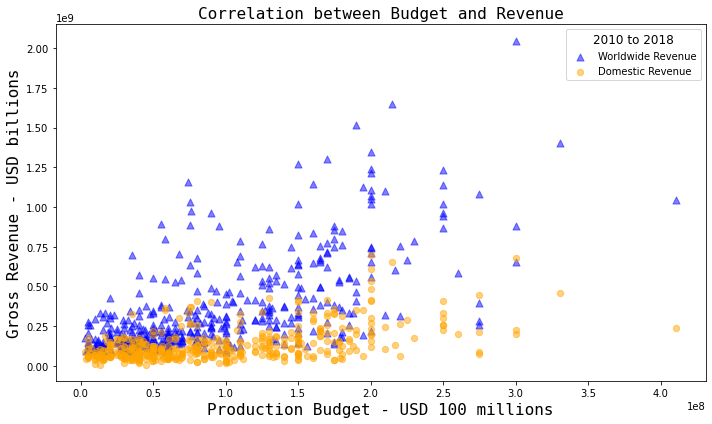

In [167]:
# Show relationship between production costs and revenue. Use scatterplot to show trend. 

fig, ax = plt.subplots(figsize=(10,6))

ax.scatter(super_df['production_budget'], super_df['worldwide_gross'],
            c ='blue',
            alpha=0.5,
            s=50,
            marker='^')

ax.scatter(super_df['production_budget'], super_df['domestic_gross'],
            c ='orange',
            alpha=0.5,
            s=40)

#set labels
plt.xlabel('Production Budget - USD 100 millions', size=16, family='monospace', weight=500)
plt.ylabel('Gross Revenue - USD billions', size=16, family='monospace')
plt.title('Correlation between Budget and Revenue', size=16, 
          family='monospace', weight=500)


# Create Legend
ax.legend(['Worldwide Revenue', 'Domestic Revenue'], title = '2010 to 2018', 
          title_fontsize = "12",loc='upper right')

plt.tight_layout();

#Save Fig
plt.savefig('images/scatter_budget_revenue.png')

#Add line of regression 
#Add side chart showing median production cost, domestic revenue, and worldwide gross

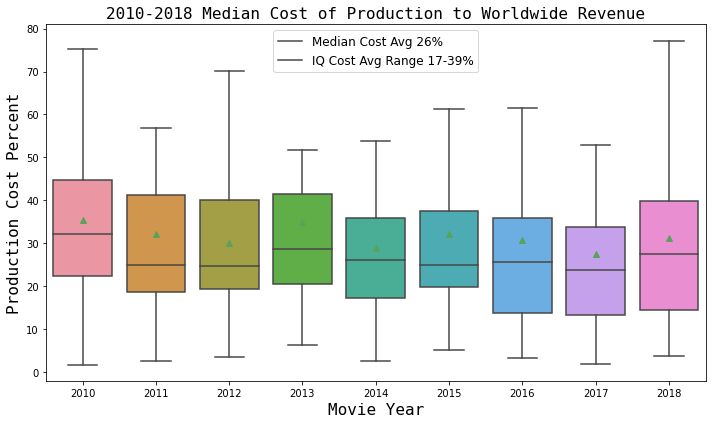

In [168]:
# Show the median and interquartile range of production budget percentages of
#worldwide gross

sns.set_palette("Set1", 8, .75)

plt.figure(figsize=(10,6))

box = sns.boxplot(x = super_df['year'], y = super_df['production_percent'], 
                  showfliers = False, showmeans = True)


# Add labels and title

plt.xlabel('Movie Year', size=16, family='monospace', weight=500)
plt.ylabel('Production Cost Percent', size=16, family='monospace')
plt.title('2010-2018 Median Cost of Production to Worldwide Revenue', size=16, 
          family='monospace', weight=500)

# Add text box labeling median, IQ range for all years

plt.legend(['Median Cost Avg 26%', 'IQ Cost Avg Range 17-39%'], fontsize = "12", 
           loc='upper center')


plt.tight_layout();

#Save Fig

plt.savefig('images/median_budget_cost.png')

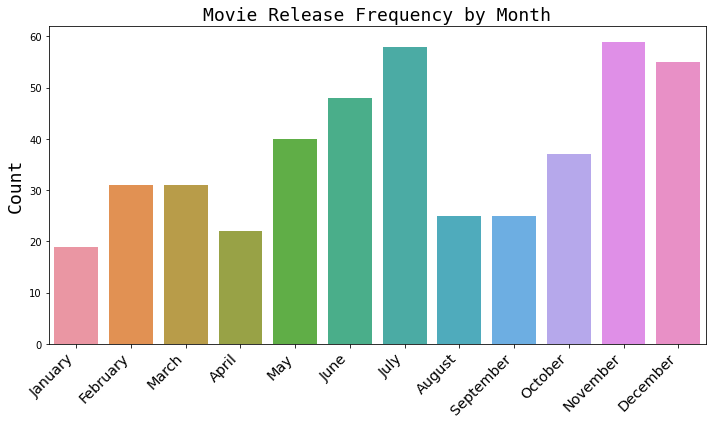

In [169]:
# Show most common months for movie release.

plt.figure(figsize=(10,6))
sns.countplot(x ='month_released', data = super_df, order = ['January', 'February',
                                                            'March', 'April', 'May',
                                                            'June', 'July', 'August',
                                                            'September', 'October',
                                                            'November', 'December'])

plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)

#Set Title and Axes Labels

plt.xlabel(None)
plt.ylabel('Count', size=18, family='monospace')
plt.title('Movie Release Frequency by Month', size=18, family='monospace', weight=500)

plt.tight_layout();

#Save Fig

plt.savefig('images/movie_month.png')

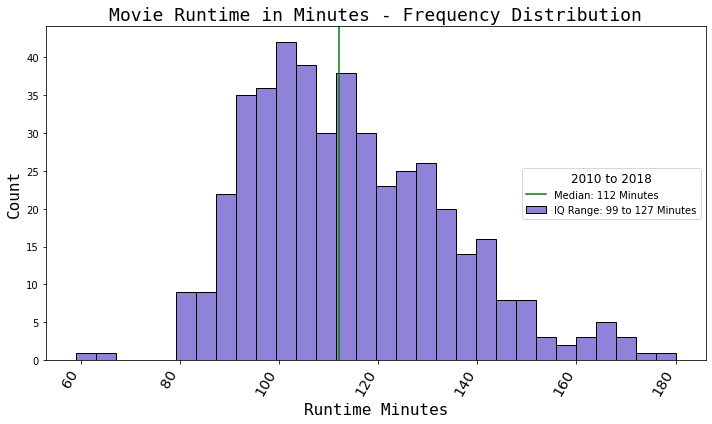

In [170]:
# Create one more visualization for runtime minutes 
plt.figure(figsize=(10,6))

sns.histplot(x ='runtime_minutes', data = super_df, bins = 30, color = 'slateblue')

plt.xticks(
    rotation=60, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)

# Display median vertical line

plt.axvline(x=super_df.runtime_minutes.median(),
            color='green')

# Label the axes 

plt.xlabel('Runtime Minutes', size=16, family='monospace', weight=500)
plt.ylabel('Count', size=16, family='monospace')
plt.title('Movie Runtime in Minutes - Frequency Distribution', size=18, 
          family='monospace', weight=500)

# Add detail

plt.legend(['Median: 112 Minutes', 'IQ Range: 99 to 127 Minutes'], title = '2010 to 2018', 
          title_fontsize = "12",loc='center right')

plt.tight_layout();

# Save Fig

plt.savefig('images/movie_minutes.png')

### Conclusions and Recommendations based on Explanatory Data Visualizations

The three datasets from Box Office Mojo, the production budget data set, and the IMDB database were merged into one dataframe that took the top 50 films from each year, 2010 to 2018, for data cleaning, query and visual analysis. Production costs, possible ranges of revenue, and factors that play into a film's likely success were examined. The end goal was to identify a pathway for Microsoft to break into the movie business. 

#### Conclusions

* For the top 50 films per year the median production budget was USD 75 million, most films budgets ranged between USD 40 to 140 million. These costs reflect a median of 26% of revenue but can vary between 17-39%. 


* Despite the steep initial production costs, the top 50 films each year enjoyed a domestic revenue median of USD 100 million. To further pad revenue worldwide releases brought in a median of USD 240 million with an interquartile range of USD 153 million to USD 443 million. A real risk remains, however, of creating a movie that barely covers production costs and possibly delivers a blow to the company's brand. 


* Timing is important when releasing a film. Many films are released around October, November, and December followed by June and July. May, June, and July see some of the highest grossing films come out. 


* Most films range between 99 to 127 minutes with a median of 112 minutes. 

#### Recommendations

* Microsoft should set aside a fund of USD 75 million per film in order to break into the top 50 films in a calendar year. The initial budget can be set lower towards the USD 40 million range but no lower. Be prepared with a cushion of funds up to that USD 75 million mark, especially because Microsoft is new to the industry. What may be a lower cost film for other studios, Microsoft will possibly have to spend more initially to establish connections with movie directors, actors, distribution networks, marketing structures and the development of movie infrastructure that it may currently lack. Microsoft could easily spend in the hundreds of millions of dollars to create just one box office hit, but it is likely worth starting with a few films that have productions costs set to the median.


* To ensure production costs are covered and to expand the return on initial investments, Microsoft should consider a worlwide release of their films instead of to domestic audiences only. The potential to match domestic revenue and beyond is a real possibility. Beware the risks, however, no movie is guaranteed box office success. Microsoft should consider development of three movie ideas to take to production to spread risk, despite higher initial investments for three films the chance of delivering a successful film is higher. 


* Microsoft should release a film sometime at the end of May or early June. This is the beginning of the summer movie season when many films are released and when some of the highest grossing films come out. November and December are also good times but so many films come out during this time it's possible Microsoft's film could get lost in the mix. 


* For an initial release the movie should range between 99 to 127 minutes. The sweet spot is around 112 minutes for many films. Longer films may require a greater attentional effort from audiences. Longer films also appear to slowly, but steadily, add to production costs. 



